In [1]:
from tensorflow.python.client import device_lib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd
import math
import seaborn as sns
import sklearn
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
print(tf.__version__)

In [ ]:
tf.config.list_physical_devices('GPU') #since I was using my computer, checking tf is using GPU

In [ ]:
device_lib.list_local_devices()

### Training and Testing Data Loading

In [6]:
train_data=pd.read_csv('./exoTrain.csv').fillna(0) #replacing NaN values with 0
train_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [7]:
test_data=pd.read_csv('./exoTest.csv').fillna(0)
test_data.head()


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [ ]:
#plotting all flux values of 4 rows
plt.figure(figsize=(13,7))
plt.plot(train_data.iloc[0],label='Exoplanet1')
plt.plot(train_data.iloc[1],label='Exoplanet2')
plt.plot(train_data.iloc[37],label='NonExoplanet1')
plt.plot(train_data.iloc[38],label='NonExoplanet2')
plt.legend()
plt.show()


### Splitting dataset

In [8]:
x_train=train_data.drop(['LABEL'],axis=1)
y_train=train_data['LABEL']

x_test=test_data.drop(['LABEL'],axis=1)
y_test=test_data['LABEL']

In [9]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()

y_train=y_train.to_numpy()
y_test=y_test.to_numpy()


In [10]:
y_train=np.where(y_train==2,1,0) #converting labels to 1->exo, 0 ->nonexo
y_test=np.where(y_test==2,1,0)

In [11]:
#confirming whether the 0/1 label change was done correctly for both train and test labels
y_train[:80]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
y_test[:50]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

### Z Scoring Data

In [13]:
mean_train=np.mean(x_train)
std_train=np.std(x_train)

x_train= (x_train - mean_train)/(std_train)
x_test=(x_test-mean_train)/(std_train)



In [14]:
print(x_test.shape)
print(y_test.shape)

(570, 3197)
(570,)


### Applying PCA

In [15]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=37)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


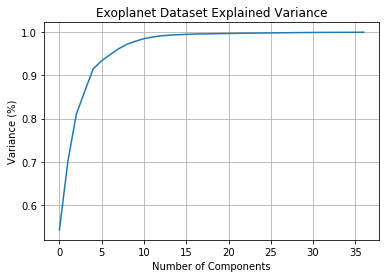

In [19]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Exoplanet Dataset Explained Variance')
plt.grid()
plt.show()

### Applying SMOTE

In [20]:
sm = SMOTE(random_state=27)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 5050
After OverSampling, counts of label '0': 5050


In [21]:
sm = SMOTE(k_neighbors=2)
x_test_res, y_test_res = sm.fit_sample(x_test, y_test)
print("After OverSampling, counts of label '1': {}".format(sum(y_test_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_res==0)))

After OverSampling, counts of label '1': 565
After OverSampling, counts of label '0': 565


In [22]:
y_train_res[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
x_train_res=x_train_res[:,:,np.newaxis]
x_test_res=x_test_res[:,:,np.newaxis]


### Splitting into Training and Validation data

In [24]:
from sklearn.model_selection import train_test_split

X_training,X_valid,Y_training,Y_valid=train_test_split(x_train_res,y_train_res,
                                                       train_size=0.8,random_state=42,shuffle=True)

In [25]:
Y_training.shape
X_training.shape

(8080, 37, 1)

### Defining the FC Model

In [163]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=512, kernel_size=3, activation='relu',input_shape=(37,1)),
        tf.keras.layers.MaxPool1D(pool_size=(2)),
        tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool1D(pool_size=(2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu', use_bias=True),
        tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Dense(50, activation='relu', use_bias=True),
        tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Dense(25, activation='relu', use_bias=True),
        tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Dense(1, activation='sigmoid')
        
    
        
    ])  





In [164]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [165]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 35, 512)           2048      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 17, 512)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 15, 128)           196736    
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 7, 128)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 896)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               89700     
_________________________________________________________________
dropout_30 (Dropout)         (None, 100)             

In [166]:
history=model.fit(X_training,Y_training,validation_data=(X_valid,Y_valid),epochs=10,
                  batch_size=50,shuffle=True)

Train on 8080 samples, validate on 2020 samples
Epoch 1/10
8080/8080 [==============================] - 2s 213us/sample - loss: 0.7044 - accuracy: 0.5364 - val_loss: 0.6765 - val_accuracy: 0.5535
Epoch 2/10
8080/8080 [==============================] - 1s 127us/sample - loss: 0.6380 - accuracy: 0.6066 - val_loss: 0.5885 - val_accuracy: 0.6510
Epoch 3/10
8080/8080 [==============================] - 1s 128us/sample - loss: 0.5803 - accuracy: 0.7437 - val_loss: 0.5840 - val_accuracy: 0.8129
Epoch 4/10
8080/8080 [==============================] - 1s 128us/sample - loss: 0.4228 - accuracy: 0.8115 - val_loss: 0.5269 - val_accuracy: 0.7708
Epoch 5/10
8080/8080 [==============================] - 1s 127us/sample - loss: 0.3613 - accuracy: 0.8535 - val_loss: 0.3973 - val_accuracy: 0.8401
Epoch 6/10
8080/8080 [==============================] - 1s 134us/sample - loss: 0.3174 - accuracy: 0.8712 - val_loss: 0.3378 - val_accuracy: 0.8822
Epoch 7/10
8080/8080 [==============================] - 1s 131us

In [167]:
scores=model.evaluate(x_test_res,y_test_res)

1130/1130 [==============================] - 0s 91us/sample - loss: 0.6796 - accuracy: 0.8106


In [168]:
print("Accuracy: %.2f%%" %(scores[1]*100))

Accuracy: 81.06%


In [162]:
y_pred=model.predict_classes(x_test_res)

In [155]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test_res, y_pred = y_pred)
print(cm)

[[507  58]
 [146 419]]


In [151]:

con_mat = tf.math.confusion_matrix(labels=y_test_res, predictions=np.squeeze(y_pred)).numpy()
con_mat

array([[507,  58],
       [146, 419]])

In [152]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = [0,1], 
                     columns = [0,1])

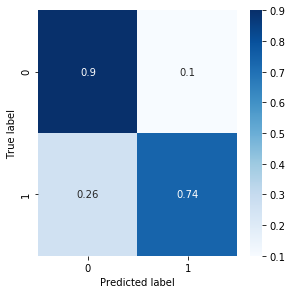

In [153]:

figure = plt.figure(figsize=(4, 4))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [117]:
y_test_res.shape

(1130,)

In [137]:
total_1=sum(y_test_res==1)
print(total_1)

total=sum(y_test_res==0)
print(total)

565
565


In [138]:
total_p1=sum(y_pred==1)
print(total_p1)

total_k=sum(y_pred==0)
print(total_k)

[507]
[623]


In [136]:
y_test_res[0:1000]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [121]:
k=np.squeeze(y_pred[500:])
k

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,